# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import datetime 
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
print(weather_api_key)

f36777298d5bdce2832ab6a551b7339d


In [18]:
# list creation to store data
Cities = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [21]:
#perform API calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#API check and pprint 
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
response = requests.get(query_url).json()
#pprint(response)

Running_count = 0
Set = 1

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url).json()
    
    if Running_count < 50:
        Running_count += 1
    else:
        Set += 1
        Running_Count = 0
    
    print("Processing Record {} of set {}|{}".format(Running_count, Set, city))
    try:
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Wind_Speed.append(response["wind"]["speed"])
        Cities.append(city)
    except:
          print("City not found. Skipping...")
          pass

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1|tsihombe
City not found. Skipping...
Processing Record 2 of set 1|port shepstone
Processing Record 3 of set 1|belushya guba
City not found. Skipping...
Processing Record 4 of set 1|longyearbyen
Processing Record 5 of set 1|byron bay
Processing Record 6 of set 1|ossora
Processing Record 7 of set 1|konstantinovka
Processing Record 8 of set 1|mahebourg
Processing Record 9 of set 1|provideniya
Processing Record 10 of set 1|rikitea
Processing Record 11 of set 1|kapaa
Processing Record 12 of set 1|illoqqortoormiut
City not found. Skipping...
Processing Record 13 of set 1|cape town
Processing Record 14 of set 1|ushuaia
Processing Record 15 of set 1|saldanha
Processing Record 16 of set 1|saint george
Processing Record 17 of set 1|cidreira
Processing Record 18 of set 1|maksatikha
Processing Record 19 of set 1|busselton
Processing Record 20 of set 1|bluff
Processing Record 21 of set 1|tilichiki
Processing Record 

Processing Record 50 of set 140|atyrau
Processing Record 50 of set 141|barrow
Processing Record 50 of set 142|wajir
Processing Record 50 of set 143|abaza
Processing Record 50 of set 144|omaruru
Processing Record 50 of set 145|tumannyy
City not found. Skipping...
Processing Record 50 of set 146|ahome
Processing Record 50 of set 147|vanavara
Processing Record 50 of set 148|qafsah
City not found. Skipping...
Processing Record 50 of set 149|thompson
Processing Record 50 of set 150|ascension
Processing Record 50 of set 151|lagoa
Processing Record 50 of set 152|hasaki
Processing Record 50 of set 153|ponta do sol
Processing Record 50 of set 154|souillac
Processing Record 50 of set 155|paamiut
Processing Record 50 of set 156|castro
Processing Record 50 of set 157|avera
Processing Record 50 of set 158|saint-francois
Processing Record 50 of set 159|tommot
Processing Record 50 of set 160|nizhneyansk
City not found. Skipping...
Processing Record 50 of set 161|upernavik
Processing Record 50 of set 

Processing Record 50 of set 332|moyale
Processing Record 50 of set 333|ankazoabo
Processing Record 50 of set 334|leningradskiy
Processing Record 50 of set 335|lata
Processing Record 50 of set 336|kruisfontein
Processing Record 50 of set 337|nador
Processing Record 50 of set 338|brigham city
Processing Record 50 of set 339|huntingdon
Processing Record 50 of set 340|codrington
Processing Record 50 of set 341|sao bento
Processing Record 50 of set 342|cabedelo
Processing Record 50 of set 343|talnakh
Processing Record 50 of set 344|busca
Processing Record 50 of set 345|hervey bay
Processing Record 50 of set 346|trinidad
Processing Record 50 of set 347|sakakah
Processing Record 50 of set 348|mitsamiouli
Processing Record 50 of set 349|nizza monferrato
Processing Record 50 of set 350|riverton
Processing Record 50 of set 351|kibala
Processing Record 50 of set 352|balkanabat
Processing Record 50 of set 353|wageningen
Processing Record 50 of set 354|trelew
Processing Record 50 of set 355|yarmout

Processing Record 50 of set 524|lubao
Processing Record 50 of set 525|rio gallegos
Processing Record 50 of set 526|shimanovsk
Processing Record 50 of set 527|uchiza
Processing Record 50 of set 528|plouzane
Processing Record 50 of set 529|fushan
Processing Record 50 of set 530|karratha
Processing Record 50 of set 531|beboto
Processing Record 50 of set 532|gizo
Processing Record 50 of set 533|ingham
Processing Record 50 of set 534|mamlyutka
Processing Record 50 of set 535|tessalit
Processing Record 50 of set 536|huarmey
Processing Record 50 of set 537|tuy hoa
Processing Record 50 of set 538|xixiang
Processing Record 50 of set 539|winneba
Processing Record 50 of set 540|marystown
Processing Record 50 of set 541|burnie
Processing Record 50 of set 542|gwanda
Processing Record 50 of set 543|blythe
Processing Record 50 of set 544|mikuni
Processing Record 50 of set 545|zapolyarnyy
Processing Record 50 of set 546|codajas
Processing Record 50 of set 547|praia
Processing Record 50 of set 548|peac

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# create raw data with pd.DataFrame 
raw_data = pd.DataFrame({"City": Cities,
                        "Cloudiness": Cloudiness,
                        "Country": Country,
                        "Date": Date,
                        "Humidity": Humidity,
                        "Lat": Lat,
                        "Lng": Lng,
                        "Max Temp": Max_Temp,
                        "Wind Speed": Wind_Speed})
raw_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port shepstone,0,ZA,1587150935,81,-30.74,30.45,69.03,11.43
1,longyearbyen,75,SJ,1587150737,69,78.22,15.64,33.80,8.05
2,byron bay,40,AU,1587150935,100,-28.65,153.62,69.80,8.05
3,ossora,1,RU,1587150935,89,59.24,163.07,14.04,6.73
4,konstantinovka,39,RU,1587150936,46,49.62,127.98,47.79,6.33


In [25]:
#convert raaw data to city data csv
City_Data = zip(Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed)
output_data = os.path.join("..","output_data","cities.csv")


In [27]:
with open(output_data, "w") as datafile:
    raw_data.to_csv(output_data)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

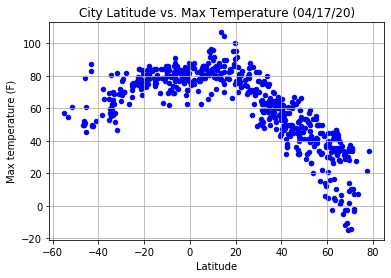

In [29]:
Date = datetime.datetime.fromtimestamp(int(raw_data['Date'][0])).strftime("%m/%d/%y")
raw_data.plot(kind='scatter', x='Lat', y='Max Temp', c='Blue')
plt.title('City Latitude vs. Max Temperature ({})'.format(Date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("../Images/CityLatvsMaxTemp.png")

#### Latitude vs. Humidity Plot

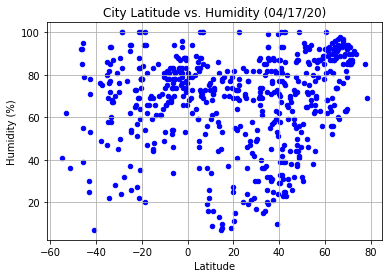

In [30]:
raw_data.plot(kind='scatter',x='Lat',y='Humidity', c='Blue')
plt.title('City Latitude vs. Humidity ({})'.format(Date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../Images/CityLatvsHumidity.png")

#### Latitude vs. Cloudiness Plot

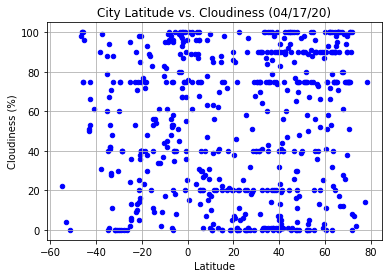

In [31]:

raw_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='Blue')
plt.title('City Latitude vs. Cloudiness ({})'.format(Date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../Images/CityLatvsCloudiness.png")

#### Latitude vs. Wind Speed Plot

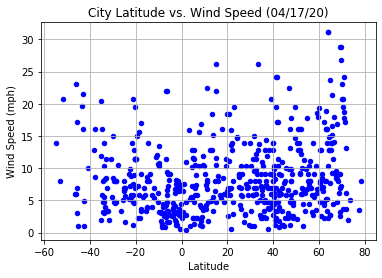

In [32]:
raw_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='Blue')
plt.title('City Latitude vs. Wind Speed ({})'.format(Date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../Images/CityLatvsWindSpeed.png")


## Linear Regression

In [36]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere = raw_data.loc[raw_data['Lat'] > 0]
Northern_Hemisphere.head()
Southern_Hemisphere = raw_data.loc[raw_data['Lat'] < 0]
Southern_Hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port shepstone,0,ZA,1587150935,81,-30.74,30.45,69.03,11.43
2,byron bay,40,AU,1587150935,100,-28.65,153.62,69.80,8.05
5,mahebourg,40,MU,1587150936,78,-20.41,57.70,77.00,11.41
7,rikitea,53,PF,1587150936,65,-23.12,-134.97,76.86,5.21
9,cape town,42,ZA,1587150887,72,-33.93,18.42,62.01,10.29


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [38]:
# use sklearn to import needed metrics
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics

The r-squared value is: 0.7688850457627372


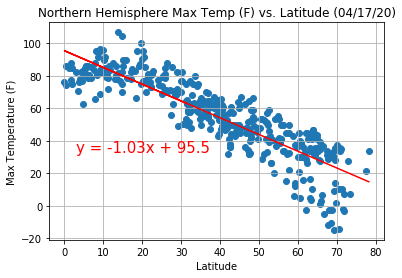

In [39]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,33),fontsize=15,color="red")

plt.title('Northern Hemisphere Max Temp (F) vs. Latitude ({})'.format(Date) )
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared value is: {rvalue**2}")

plt.grid()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.45556279736632194


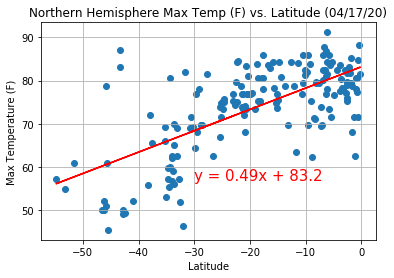

In [40]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,57),fontsize=15,color="red")

plt.title('Northern Hemisphere Max Temp (F) vs. Latitude ({})'.format(Date) )
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared value is: {rvalue**2}")

plt.grid()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.09277939053372174


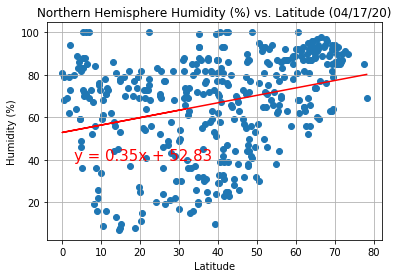

In [41]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3,40),fontsize=15,color="red")

plt.title('Northern Hemisphere Humidity (%) vs. Latitude ({})'.format(Date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared value is: {rvalue**2}")

plt.grid()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.056470702804495024


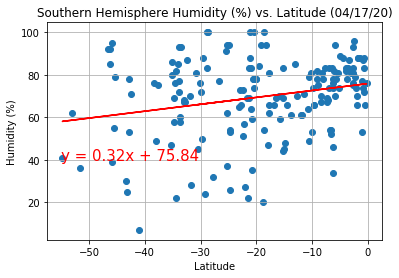

In [42]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")

plt.title('Southern Hemisphere Humidity (%) vs. Latitude ({})'.format(Date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared value is: {rvalue**2}")

plt.grid()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.04363165969260845


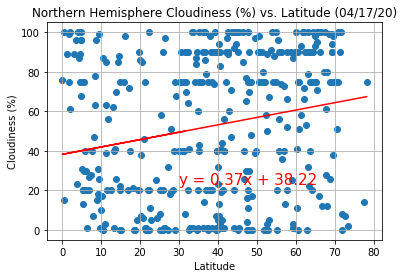

In [43]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,23),fontsize=15,color="red")

plt.title('Northern Hemisphere Cloudiness (%) vs. Latitude ({})'.format(Date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared value is: {rvalue**2}")

plt.grid()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.029585421711318175


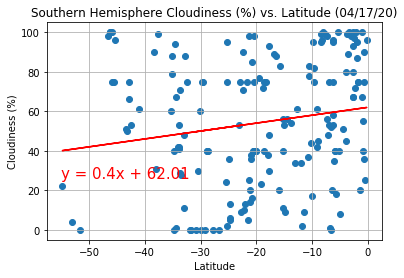

In [44]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,26),fontsize=15,color="red")

plt.title('Southern Hemisphere Cloudiness (%) vs. Latitude ({})'.format(Date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared value is: {rvalue**2}")

plt.grid()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.040992539605081715


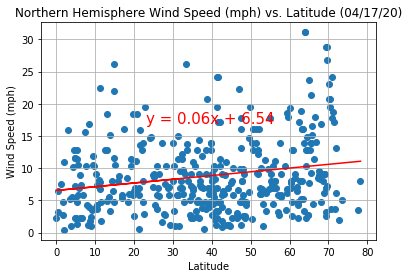

In [45]:
x_values = Northern_Hemisphere['Lat']
y_values = Northern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(23,17),fontsize=15,color="red")

plt.title('Northern Hemisphere Wind Speed (mph) vs. Latitude ({})'.format(Date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared value is: {rvalue**2}")

plt.grid()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.11775339088105748


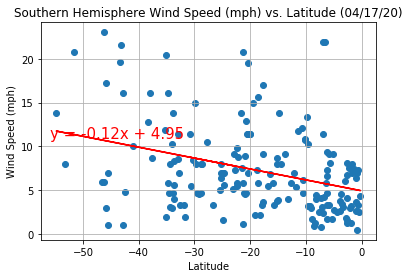

In [46]:
x_values = Southern_Hemisphere['Lat']
y_values = Southern_Hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-56,11),fontsize=15,color="red")

plt.title('Southern Hemisphere Wind Speed (mph) vs. Latitude ({})'.format(Date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared value is: {rvalue**2}")

plt.grid()

In [ ]:
# Analysis of 3 trends and reasoning
#In the plot graph for City Latitude vs Max temperature it is seen that between the latitude of 0 and 20 shows the highest temperature. This proves that the closer we get to the equator the hotter it is. Also see the Northern Hemisphere max temp vs latitudes linear regression temperature decreasing as we move further away from the equators latitude of 0 and is further supported by a r squared value of .76.
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression shows that latitude has little effect to wind speed measured with a low r squared value of .04
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression shows that cloudiness Is random across latitude points measured with a r squared value of .04


